In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [5]:
y.value_counts()


0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

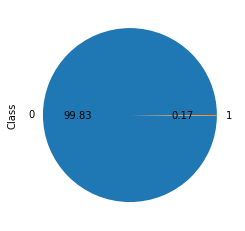

In [6]:
y.value_counts().plot.pie(autopct = '%.2f')

1    492
0    492
Name: Class, dtype: int64


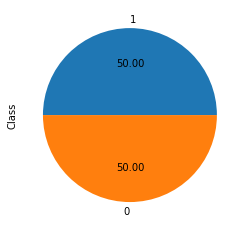

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)

X_res, y_res = rus.fit_resample(X,y)

y_res.value_counts().plot.pie(autopct = "%.2f")

print(y_res.value_counts())

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [11]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [22:12<00:00, 45.95s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.98,0.92,0.92,0.99,1.01
RandomForestClassifier,1.00,0.90,0.90,1.00,146.78
GaussianNB,0.98,0.90,0.90,0.99,0.57
XGBClassifier,1.00,0.90,0.90,1.00,17.98
ExtraTreesClassifier,1.00,0.89,0.89,1.00,15.82
BaggingClassifier,1.00,0.89,0.89,1.00,78.05
LinearSVC,1.00,0.89,0.89,1.00,46.81
PassiveAggressiveClassifier,1.00,0.89,0.89,1.00,0.67
KNeighborsClassifier,1.00,0.88,0.88,1.00,589.84


In [21]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate = 0.05, n_jobs = 4)

model.fit(X_train,y_train,verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
predictions = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(predictions,y_test)

print("MAE :", mae)

MAE : 0.003830527921331849
